In [1]:
#import libraries
import pandas as pd
import os

# Load your dataset
df= pd.read_csv('data/mental-heath-in-tech-2016_20161114.csv')
# Check the first few rows of the dataset
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

(1433, 63)

In [3]:
# Basic info (check for missing values and data types)
print(df.to_string(index=False))
# Get descriptive statistics for numerical columns
df.describe()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [4]:
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

1. Are you self-employed?
2. How many employees does your company or organization have?
3. Is your employer primarily a tech company/organization?
4. Is your primary role within your company related to tech/IT?
5. Does your employer provide mental health benefits as part of healthcare coverage?
6. Do you know the options for mental health care available under your employer-provided coverage?
7. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
8. Does your employer offer resources to learn more about mental health concerns and options for seeking help?
9. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
10. If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
11. Do you think that discussing a mental health disorder with your employer would have negative c

In [5]:
# Column names you provided earlier
columns_new_complete = [

  'Self Employed',
  'Company Size',
  'tech company Flag',
  'Tech Role',
  'MH Coverage',
  'MH Coverage Awareness',
  'MH Employer Discussion',
  'MH Resources Provided',
  'MH Anonymity',
  'Medical Leave',
  'MH Discussion Neg Impact',
  'PH Discussion Neg Impact',
  'MH Discussion Coworkers',
  'MH Discussion Supervisor(s)',
  'MH vs PH Employer',
  'MH Consequence Coworkers',
  'MH Coverage (Private or State)',
  'MH Resource Knowledge (local or online)',
  'MH Reveal to Clients/Business',
  'MH Client/Business Impact',
  'MH Reveal to Coworkers/employees',
  'MH Coworker Neg Impact',
  'MH Productivity Affected',
  'MH Productivity %',
  'Previous Employers',
  'Previous MH Benefits',
  'Previous MH Awareness',
  'Previous MH Discussion',
  'Previous MH Resources Provided',
  'Previous MH Anonymity',
  'Previous MH Discussion Neg Impact',
  'Previous PH Discussion Neg Impact',
  'Previous MH Discussion Coworkers',
  'Previous MH Discussion Supervisor(s)',
  'Previous MH vs PH',
  'Previous MH Coworkers Reveal Neg',
  'PH In Interview',
  'Why/ Why Not_ph',
  'MH In Interview',
  'Why/Why Not_mh',
  'MH Bad Impact on Career',
  'MH Neg View of team members/Coworkers',
  'MH Sharing with Family/Friends',
  'MH Bad Response',
  'Less Reveal MH After Observation',
  'MH Family History',
  'Past MH Disorder',
  'Current MH Disorder',
  'MH Diagnosed Conditions',
  'MH Self-believed Conditions',
  'MH Diagnosed by Professional',
  'MH Diagnosed Conditions',
  'MH Sought Professional Treatment',
  'MH Effective Treatment Impact',
  'MH NOT Effective Treatment Impact',
  'Age',
  'Gender',
  'Living Country',
  'Living US State',
  'Working Country',
  'Working US State',
  'Work Position',
  'Remote Work',
]

# Ensure the correct number of columns
if len(df.columns) == len(columns_new_complete):
    df.columns = columns_new_complete
else:
    print("Mismatch in column length!")
    # Optionally print lengths for debugging
    print(f"DataFrame Columns: {len(df.columns)}")
    print(f"New Columns: {len(columns_new_complete)}")
    df.columns = columns_new_complete  # full list of 63
#df.drop(columns=columns_to_drop, inplace=True)


Columns in survey data are renamed to improve readability, consistency, and usability in analysis and visualization.

Columns to drop (>30% missing): 15 out of 63 total columns


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_5217/927240710.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing Proportion', y='Column', data=missing_df, palette="flare")


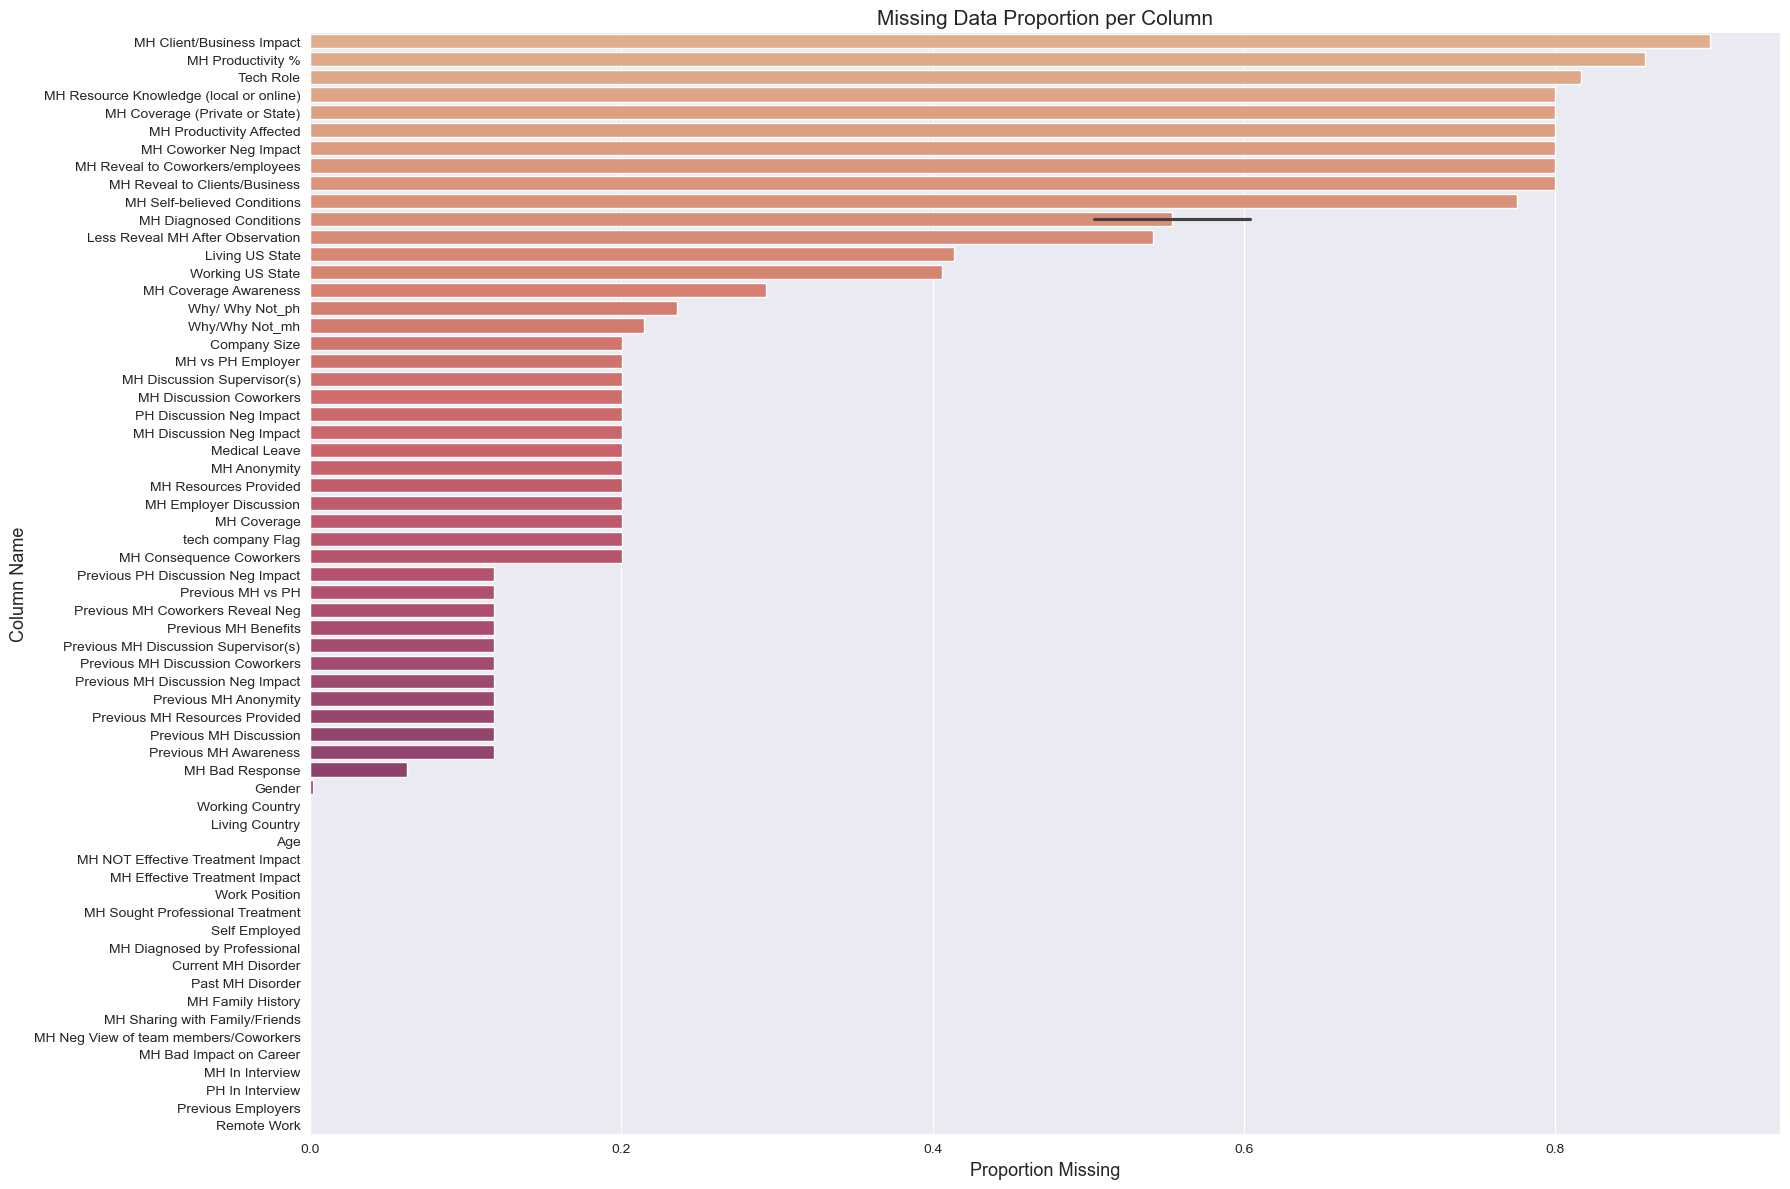

In [6]:
# Check how many columns have >30% missing
high_missing = df.isna().mean() > 0.3
num_to_drop = high_missing.sum()

print(f"Columns to drop (>30% missing): {num_to_drop} out of {df.shape[1]} total columns")
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing percentages
missing_pct = df.isna().mean().sort_values(ascending=False)

# Calculate missing percentages
missing_pct = df.isna().mean().sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')  # Ensure white background

# Calculate missing percentages
missing_pct = df.isna().mean().sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reset Seaborn style to whitegrid for clean background
sns.set_style("darkgrid")

# Prepare DataFrame for plotting
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing Proportion': missing_pct.values
})

# Set the figure size
plt.figure(figsize=(18, 12))

# Create horizontal bar plot from bottom to top
sns.barplot(x='Missing Proportion', y='Column', data=missing_df, palette="flare")

# Add labels and title
plt.xlabel("Proportion Missing", fontsize=13)
plt.ylabel("Column Name", fontsize=13)
plt.title("Missing Data Proportion per Column", fontsize=15)

output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

plot_path = os.path.join(output_dir, "missing_data_proportion.png")

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
cols_to_drop = df.columns[df.isna().mean() > 0.3]
df.drop(cols_to_drop, axis=1, inplace=True)
len(df.columns)

48

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(df)
processed_data = mode_imputer.transform(df)
df_processed = pd.DataFrame(data=processed_data, columns=df.columns)

In [9]:
df.shape

(1433, 48)

Age

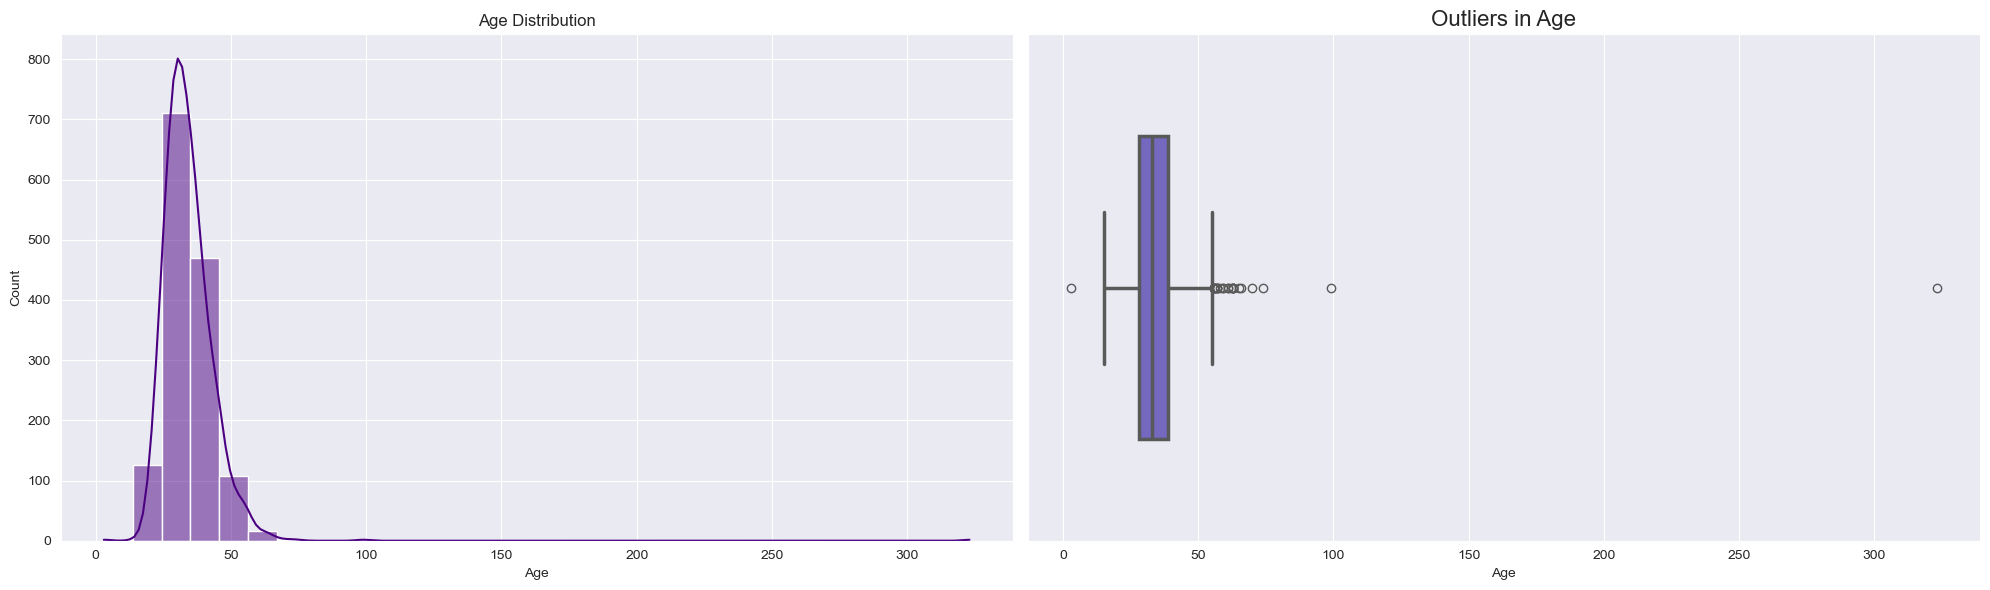

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the figure size

# Plot the histogram on the first subplot
sns.histplot(df['Age'], bins=30, kde=True, color='#4B0082', ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

# Plot the boxplot on the second subplot
sns.set_style("darkgrid")
sns.boxplot(data=df['Age'],color='slateblue', orient='h', linewidth=2.5, width=0.6, ax=ax[1])
ax[1].set_title('Outliers in Age', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

#save img
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

plot_path = os.path.join(output_dir, "age_proportion_outliers.png")

# Display the plots
plt.show()

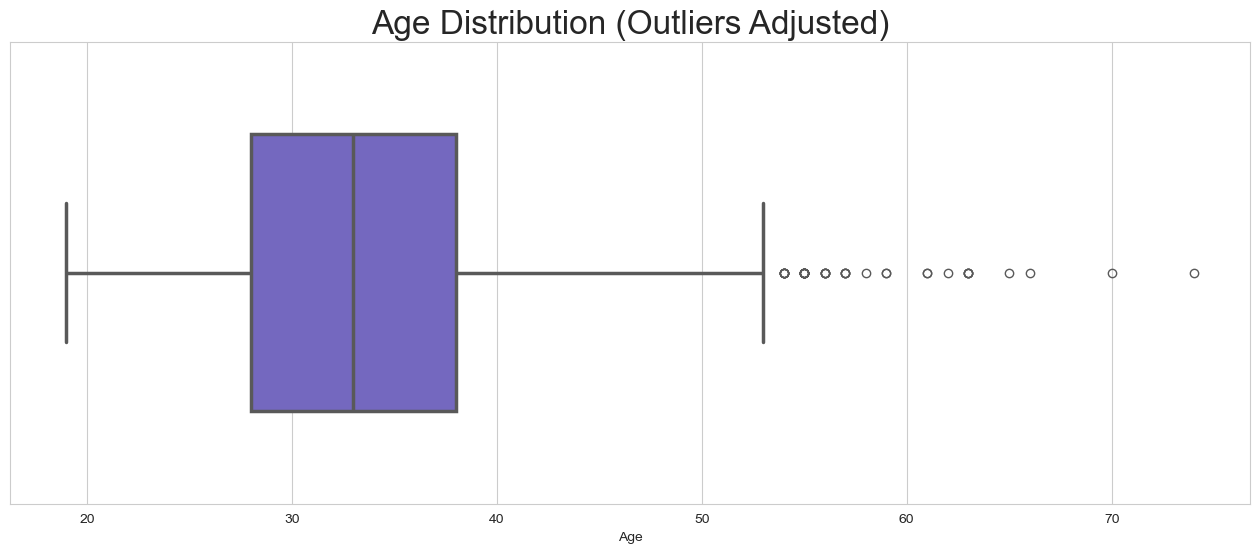

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Ensure 'Age' is numeric (in case it was imputed as string/object)
df_processed['Age'] = pd.to_numeric(df_processed['Age'], errors='coerce')

# Define valid age range (18 to 75)
valid_age_mask = (df_processed['Age'] >= 18) & (df_processed['Age'] <= 75)

# Compute the mean of valid ages
valid_mean = round(df_processed.loc[valid_age_mask, 'Age'].mean())

# Replace outlier ages (<18 or >75) with the valid mean
df_processed.loc[~valid_age_mask, 'Age'] = valid_mean

# Plot boxplot of the adjusted age distribution
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(data=df_processed['Age'], color='slateblue', orient='h', linewidth=2.5, width=0.6)
ax.set_title('Age Distribution (Outliers Adjusted)', fontsize=24)

#save img
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

plot_path = os.path.join(output_dir, "age_outliers_adjust.png")

plt.show()

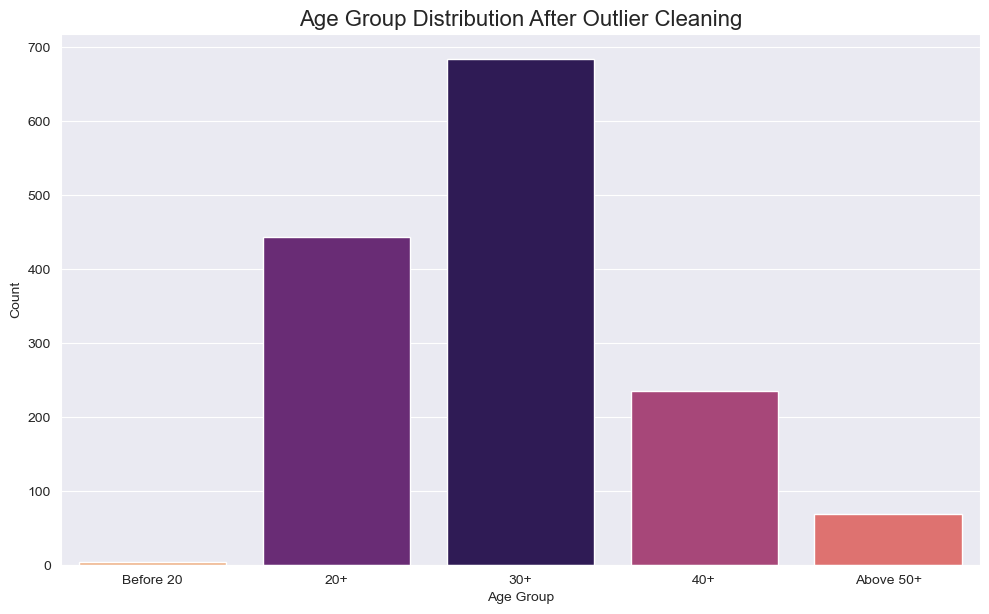

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean outliers on df_processed
df_processed = df_processed[df_processed['Age'].notna()]  # remove NaNs if needed
df_processed['Age'] = df_processed['Age'].apply(
    lambda x: round(df_processed[(df_processed['Age'] >= 18) & (df_processed['Age'] <= 75)]['Age'].mean())
    if x < 18 or x > 75 else x
)

# Step 2: Define age group function
def categorize_age(age):
    if 17 <= age < 20:
        return 'Before 20'
    elif 20 <= age < 30:
        return '20+'
    elif 30 <= age < 40:
        return '30+'
    elif 40 <= age < 50:
        return '40+'
    elif 50 <= age <= 75:
        return 'Above 50+'
    else:
        return 'Other'

# Apply grouping
df_processed['Age Group'] = df_processed['Age'].apply(categorize_age)

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.countplot(
    data=df_processed,
    x='Age Group',
    order=['Before 20', '20+', '30+', '40+', 'Above 50+'],
    hue='Age Group',
    palette='magma',
    legend=False
)

#layout adjustment
plt.tight_layout()

# save img
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "age_group_proportion.png")

plt.title("Age Group Distribution After Outlier Cleaning", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.show()

In [32]:
df_processed.drop(columns=['Age'], inplace=True)
#df_processed.rename(columns={'Age Group': 'Age'}, inplace=True)

Gender

In [15]:
len(df.Gender.value_counts())
df[['Gender']].head(20)

,Gender
0,Male
1,male
2,Male
3,male
4,Female
5,Male
6,M
7,female
8,Female
9,Male


In [17]:

# Define gender category lists
Male = ['Male', 'male', 'Male ', 'M', 'm','man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)',
        'Man', 'Sex is male','cis male', 'Malr', 'Dude',
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
        'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'Male (trans, FtM)', 'cisdude', 'cis man', 'MALE']

Female = ['Female', 'female', 'I identify as female.', 'female ','Female assigned at birth ', 'F', 'Woman',
          'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
          'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem',
          'Female (props for making this a freeform field, though)',' Female', 'Cis-woman',
          'female-bodied; no feelings about gender','AFAB']

other = ['Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine',
         'none of your business', 'genderqueer', 'Human', 'Genderfluid','Enby', 'genderqueer woman', 'mtf',
         'Queer', 'Agender', 'Fluid','Nonbinary', 'human', 'Unicorn', 'Genderqueer','Genderflux demi-girl',
         'Transgender woman','Yes','No']

# Replace all values in the Gender column
df_processed['Gender'] = df_processed['Gender'].replace(to_replace=Male, value='Male')
df_processed['Gender'] = df_processed['Gender'].replace(to_replace=Female, value='Female')
df_processed['Gender'] = df_processed['Gender'].replace(to_replace=other, value='Other')

# Print result
print(df_processed['Gender'].value_counts())

Gender
Male      1063
Female     343
Other       27
Name: count, dtype: int64


In [19]:
# Now safe to modify
df_processed['Gender'] = df_processed['Gender'].str.strip().str.lower()
df_processed = df_processed[df_processed['Gender'] != 'other'].copy()  # Filter and copy again
df_processed['Gender'] = df_processed['Gender'].replace({'male': 'Male', 'female': 'Female'})

# Check results
print(df_processed['Gender'].value_counts())

Gender
Male      1063
Female     343
Name: count, dtype: int64


Country

In [20]:
print(df_processed['Working Country'].value_counts())
print(df_processed['Living Country'].value_counts())

Working Country
United States of America    835
United Kingdom              178
Canada                       73
Germany                      56
Netherlands                  46
Australia                    34
Sweden                       20
Ireland                      14
France                       14
Brazil                       10
Switzerland                   9
India                         9
Russia                        9
New Zealand                   9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Czech Republic                3
Italy                         3
Chile                         3
Norway                        3
Romania                       3
Spain                         3
Other                         2
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan                

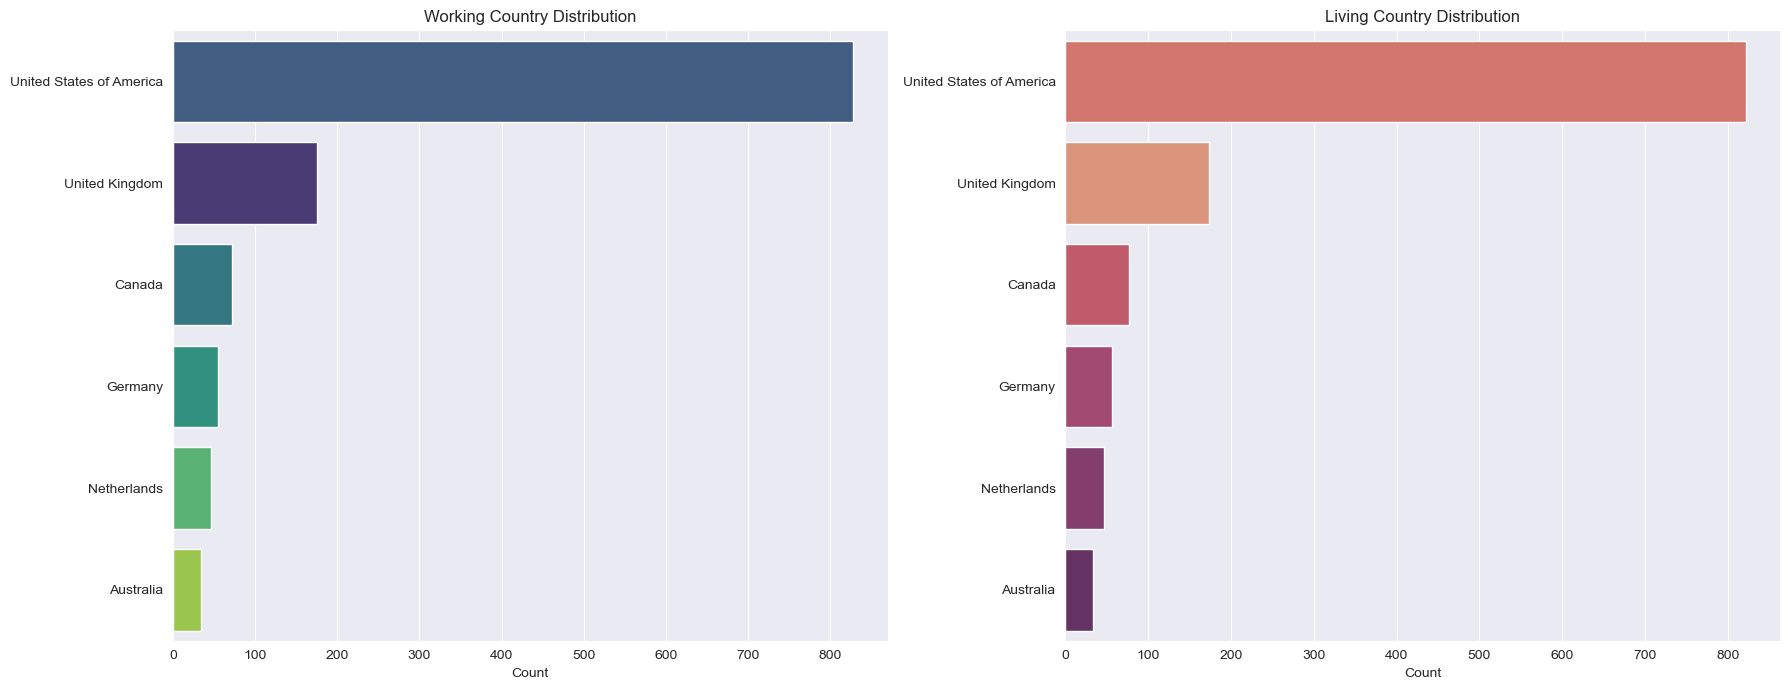

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of target countries
target_countries = ["United States of America", "United Kingdom", "Canada", "Germany", "Netherlands", "Australia"]

# Filter the DataFrame
df_processed = df_processed[
    df_processed['Working Country'].isin(target_countries) &
    df_processed['Living Country'].isin(target_countries)
]

# Set style for plots
sns.set_style("darkgrid")

# Set up a side-by-side figure
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=False)

# Plot 1 - Working Country
sns.countplot(
    data=df_processed,
    y='Working Country',
    order=df_processed['Working Country'].value_counts().index,
    palette='viridis',
    ax=axes[0],
    hue='Working Country',
    legend=False
)
axes[0].set_title("Working Country Distribution")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("")

# Plot 2 - Living Country
sns.countplot(
    data=df_processed,
    y='Living Country',
    order=df_processed['Living Country'].value_counts().index,
    palette='flare',
    ax=axes[1],
    hue='Living Country',
    legend=False
)
axes[1].set_title("Living Country Distribution")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")


# Layout adjustment
plt.tight_layout()

# Save plot to 'images' directory
import os
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "working_living_country_distribution.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

In [23]:
country_rename_map = {
    "United States of America": "US",
    "United Kingdom": "UK",
    "Germany": "DE",
    "Canada": "CA",
    "Netherlands": "NL",
    "Australia": "AU"
}
df_processed['Working Country'] = df_processed['Working Country'].replace(country_rename_map)
df_processed['Living Country'] = df_processed['Living Country'].replace(country_rename_map)
# Filter the countries that have at least 20 entries in both 'Working Country' and 'Living Country'
df_processed = df_processed[df_processed['Working Country'].map(df_processed['Working Country'].value_counts()) >= 20]
df_processed = df_processed[df_processed['Living Country'].map(df_processed['Living Country'].value_counts()) >= 20]

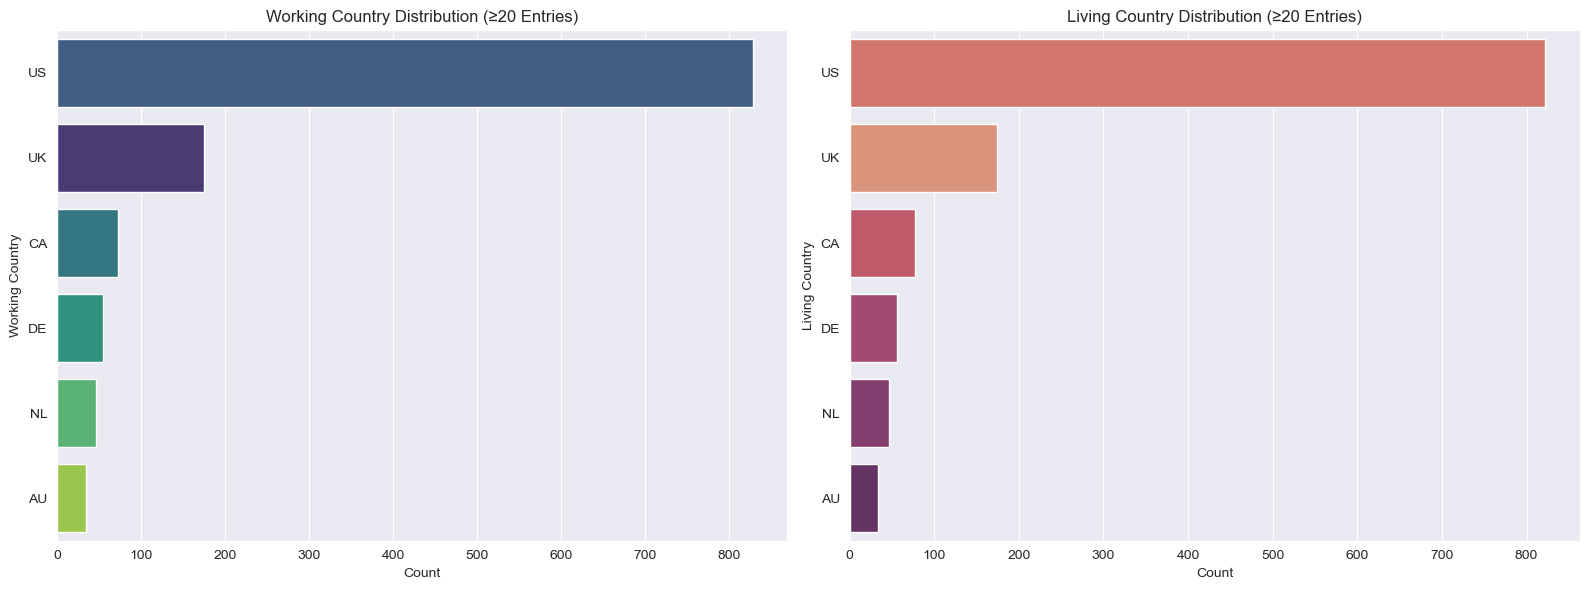

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("darkgrid")

# Create a figure with 2 subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

# --- Plot Working Country ---
sns.countplot(data=df_processed, y='Working Country',
              hue='Working Country',  # Add hue to silence the warning
              dodge=False,            # Prevent splitting bars
              order=df_processed['Working Country'].value_counts().index,
              palette='viridis', ax=ax[0], legend=False)
ax[0].set_title("Working Country Distribution (≥20 Entries)")
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Working Country")

# --- Plot Living Country ---
sns.countplot(data=df_processed, y='Living Country',
              hue='Living Country',
              dodge=False,
              order=df_processed['Living Country'].value_counts().index,
              palette='flare', ax=ax[1], legend=False)
ax[1].set_title("Living Country Distribution (≥20 Entries)")
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Living Country")

# Adjust layout
plt.tight_layout()

# Save plot to img directory
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "renamed_working_living_country_distribution.png")
plt.savefig(plot_path)
# show the plot
plt.show()


Why / Why not

In [25]:
negative_impact_conditions = ["depend", "support", "same", "bad", "deter", "relate", "qualif",
                              "underst", "hurt", 'chance', "crazy", "doubt",  "weak", "product", "liability",
                              "nothing", "allude", "reject", "respect", "eliminat", "pass", "leave", "filter", "expect",
                              "complain"]

discrimination_conditions = ["stigma", "discrimination", "cost", "serious", "IQ", "believe", "disqualify", "discount", "prejudice",
                             "taboo", "judge", "fear", "disability", "unstable", "unreliable"]

privacy_conditions = ["personal", "priva", "accommodation", "situation", "trust", "problem", "shar", "sensitive", "never",
                      "feel", "business", "reflect", "embarass", "obligat", "concern", "condition"]

uncertainty_conditions = ["reaction", "recept", "sure", "issue", "offer", "know", "neg", "afraid", "refus",
                          "necessary", "vulnerable", "stupid", "crap"]

job_performance_conditions = ["map", "bias", "impact", "compromise", "uncomfortable", "relate", "job", "against",
                              "sign", "discuss", "ffect", "no"]

legal_conditions = ["manageable", "suicide", "dismis", "depression", "anxiety", "ocd", "burn", "consider"]

transparency_conditions = ["support", "relevant", "reaction", "prompt", "doubt", "perceive", "risk", "accept", "honest",
                          "perception", "option", "important", "open", "protect"]

lack_of_benefit_conditions = ["appl", "above", "part", "topical", "stance", "aware","roadblock", "won't", "harm",
                              "position", "benef", "previous", "physical", "potential", "as", "see", "disclos"]

categories = {
    "Negative Impact on Hiring Chances": negative_impact_conditions,
    "Fear of Discrimination or Prejudice": discrimination_conditions,
    "Privacy and Personal Concerns": privacy_conditions,
    "Uncertainty about Employer Reaction": uncertainty_conditions,
    "Concerns about Job Performance or Suitability": job_performance_conditions,
    "Legal and Rights Considerations": legal_conditions,
    "Desire for Transparency and Alignment": transparency_conditions,
    "Lack of Benefit in Disclosing": lack_of_benefit_conditions
}

answer = df_processed['Why/ Why Not_ph']
# Function to categorize each response
def categorize_reason(text):
    text = str(text).lower()
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            return category
    return "Other"

# Apply the categorization function
df_processed['Why/ Why Not_ph'] = df_processed['Why/ Why Not_ph'].apply(categorize_reason)

# View the unique categories
print(df_processed['Why/ Why Not_ph'].unique())

['Fear of Discrimination or Prejudice' 'Negative Impact on Hiring Chances'
 'Uncertainty about Employer Reaction'
 'Concerns about Job Performance or Suitability'
 'Privacy and Personal Concerns' 'Other'
 'Desire for Transparency and Alignment' 'Lack of Benefit in Disclosing'
 'Legal and Rights Considerations']


In [26]:
answer = df_processed['Why/Why Not_mh']
# Function to categorize each response
def categorize_reason(text):
    text = str(text).lower()
    for category, keywords in categories.items():
        if any(keyword in text for keyword in keywords):
            return category
    return "Other"

# Apply the categorization function
df_processed['Why/Why Not_mh'] = df_processed['Why/Why Not_mh'].apply(categorize_reason)

# View the unique categories
print(df_processed['Why/Why Not_mh'].unique())

['Fear of Discrimination or Prejudice'
 'Uncertainty about Employer Reaction' 'Negative Impact on Hiring Chances'
 'Privacy and Personal Concerns' 'Desire for Transparency and Alignment'
 'Other' 'Concerns about Job Performance or Suitability'
 'Lack of Benefit in Disclosing' 'Legal and Rights Considerations']


In [27]:
# Create a mask for all work positions that contain a tech-related role
mask_tech_company_flag = df_processed['Work Position'].str.contains('Back-end|Front-end|DevOps|SysAdmin|Developer', na=False)

# Initialize the 'tech_role_flag' column as 'No' for all rows
df_processed['tech company Flag'] = 'No'

# Fill 'tech_role_flag' with 'Yes' where the mask is True
df_processed.loc[mask_tech_company_flag , 'tech company Flag'] = 'Yes'

# Show the distribution of tech roles
print(df_processed['tech company Flag'].value_counts())

tech company Flag
Yes    843
No     367
Name: count, dtype: int64


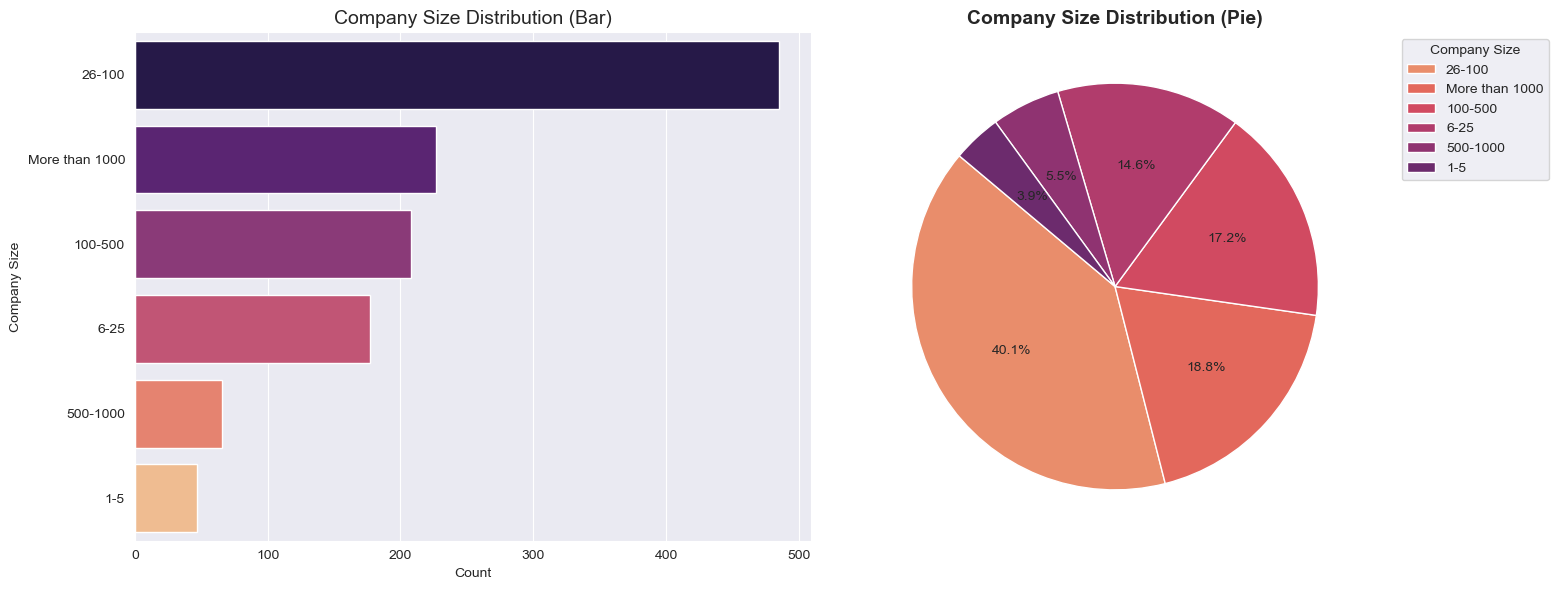

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
company_counts = df_processed['Company Size'].value_counts().reset_index()
company_counts.columns = ['Company Size', 'count']

company_size_counts = df_processed['Company Size'].value_counts().dropna()
company_size_counts = company_size_counts[~company_size_counts.index.str.contains('Not sure', case=False)]

# Percentage formatting for pie chart
def format_pct(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.set_style("darkgrid")

# Barplot on ax1
sns.barplot(
    data=company_counts,
    x='count',
    y='Company Size',
    hue='Company Size',
    palette='magma',
    dodge=False,
    legend=False,
    ax=ax1
)
ax1.set_title('Company Size Distribution (Bar)', fontsize=14)
ax1.set_xlabel('Count')
ax1.set_ylabel('Company Size')

# Pie chart on ax2
company_size_counts.plot.pie(
    autopct=format_pct,
    startangle=140,
    colors=sns.color_palette("flare", len(company_size_counts)),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    labeldistance=None,
    textprops={'fontsize': 10},
    ax=ax2
)
ax2.set_title('Company Size Distribution (Pie)', fontsize=14, fontweight='bold')
ax2.set_ylabel('')  # Hide y-label
ax2.legend(company_size_counts.index, title="Company Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Save plot to img directory
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "company_size_dist.png")
plt.savefig(plot_path)
#show the plot
plt.show()

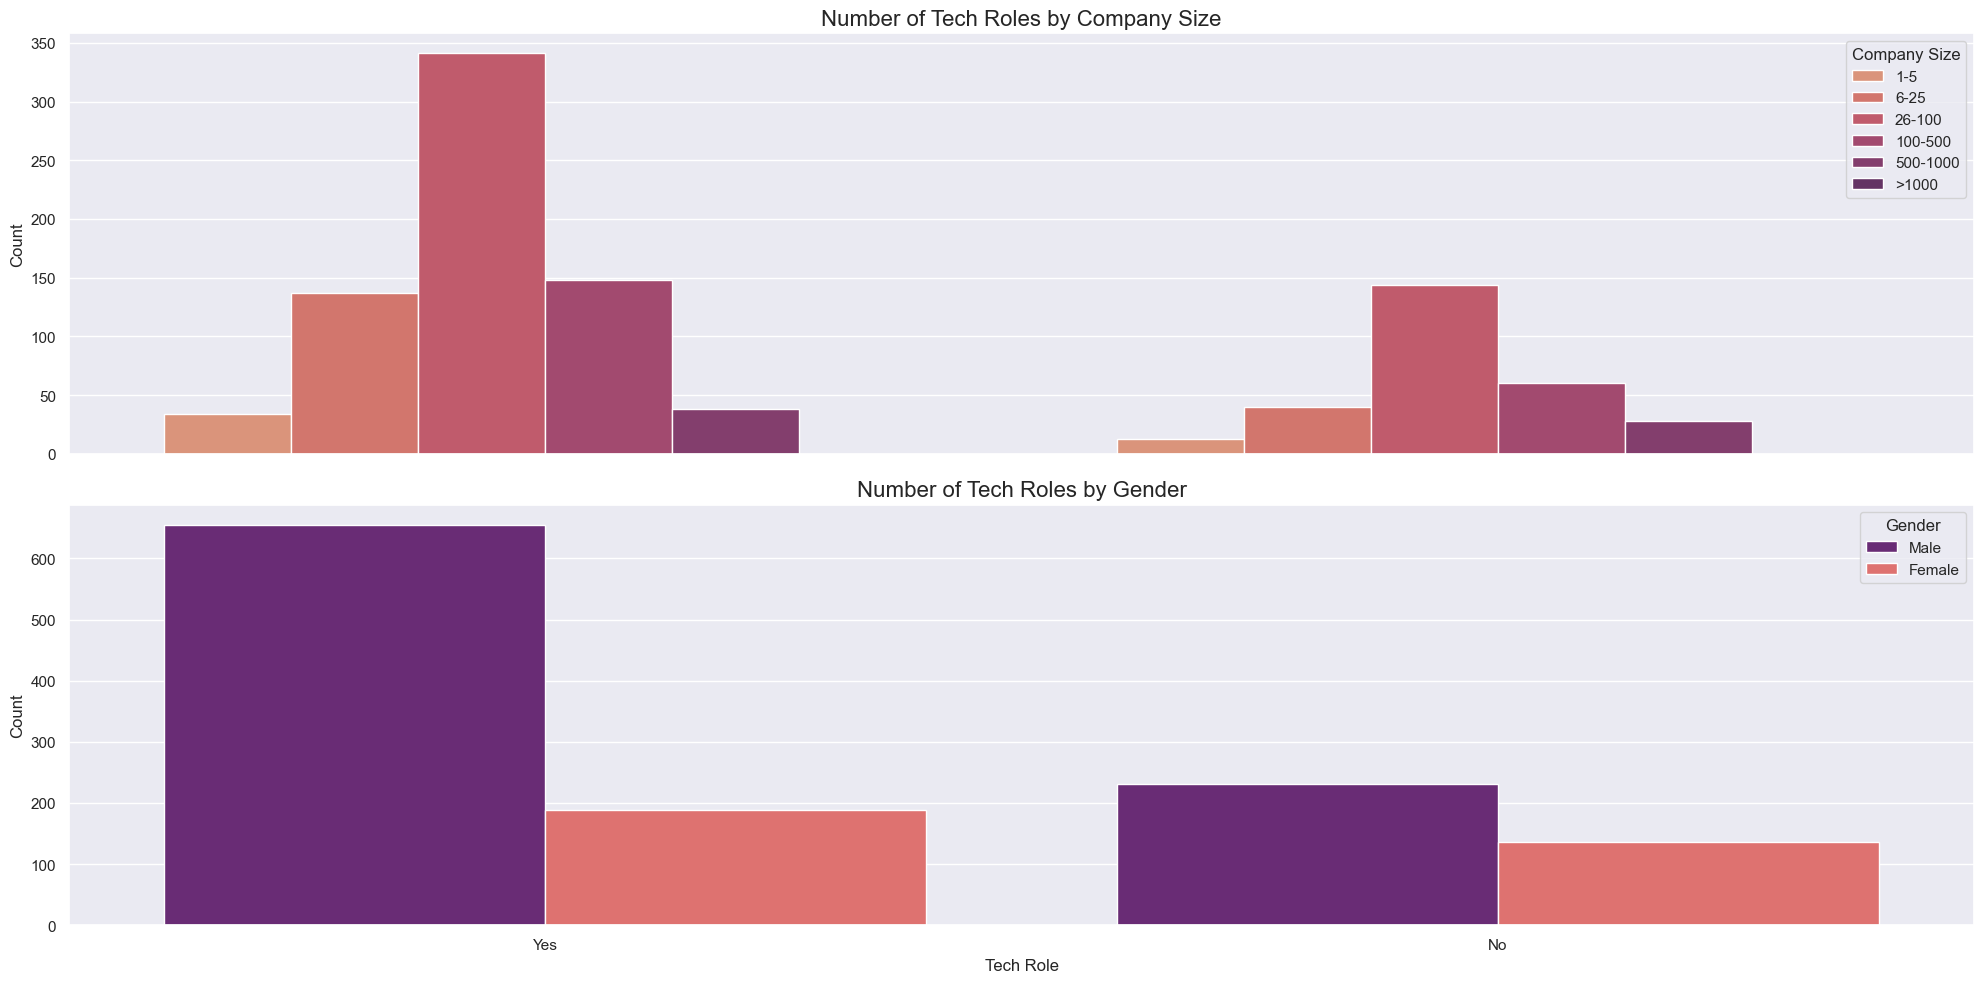

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, figsize=(20, 10), sharex=True)

# Define consistent order for company size
company_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", ">1000"]

# Plot 1: Tech roles by company size
sns.countplot(
    data=df_processed,
    x="tech company Flag",
    hue="Company Size",
    hue_order=company_order,
    palette="flare",
    ax=axes[0]
)
axes[0].set_title("Number of Tech Roles by Company Size", fontsize=16)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Tech Role")

# Plot 2: Tech roles by gender
sns.countplot(
    data=df_processed,
    x="tech company Flag",
    hue="Gender",
    palette="magma",
    ax=axes[1]
)
axes[1].set_title("Number of Tech Roles by Gender", fontsize=16)
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Tech Role")

# Adjust layout
plt.tight_layout()
# Save plot to 'images' directory
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "N_Tech_Roles_company_size.png")
plt.savefig(plot_path)
#show the plot
plt.show()

In [30]:

df_processed.head()

,Self Employed,Company Size,tech company Flag,MH Coverage,MH Coverage Awareness,MH Employer Discussion,MH Resources Provided,MH Anonymity,Medical Leave,MH Discussion Neg Impact,...,MH Sought Professional Treatment,MH Effective Treatment Impact,MH NOT Effective Treatment Impact,Age,Gender,Living Country,Working Country,Work Position,Remote Work,Age Group
0,0,26-100,Yes,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,0,Not applicable to me,Not applicable to me,39,Male,UK,UK,Back-end Developer,Sometimes,30+
1,0,6-25,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,1,Rarely,Sometimes,29,Male,US,US,Back-end Developer|Front-end Developer,Never,20+
2,0,6-25,Yes,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,1,Not applicable to me,Not applicable to me,38,Male,UK,UK,Back-end Developer,Always,30+
3,1,26-100,No,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,1,Sometimes,Sometimes,43,Male,UK,UK,Supervisor/Team Lead,Sometimes,40+
4,0,6-25,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,1,Sometimes,Sometimes,43,Female,US,US,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,40+


In [33]:
# Suppose df is your original DataFrame
df_processed.copy()  # After cleaning, before encoding
df_processed.to_csv('processed_data/cleaned_data.csv', index=False)

In [ ]:
categorical_renamed = [column for column in df_processed.columns if df_processed[column].dtype == 'object']

In [ ]:
# Suppose df is your original DataFrame
# = df_processed.copy()  # After cleaning, before encoding
#df_processed.to_csv('processed_data/cleaned_data.csv', index=False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
ohe = OneHotEncoder(sparse_output=False)  # drop='first' avoids multicollinearity

ohe = pd.DataFrame(ohe.fit_transform(df_processed[categorical_renamed]),
                            columns=ohe.get_feature_names_out(categorical_renamed))

# Drop original categorical columns and concatenate OHE features
df_imputed = pd.concat([df_processed.drop(columns=categorical_renamed), ohe], axis=1)

In [ ]:
df_processed.head()

Feature Encoded

In [ ]:
df_processed.to_csv('processed_data/cleaned_data.csv', index=False)
from sklearn.preprocessing import LabelEncoder
encoded_df = df_processed.copy()

le = LabelEncoder()

for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        encoded_df[column] = le.fit_transform(encoded_df[column].astype(str))

encoded_df.head()

In [ ]:
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(encoded_df.corr(), dtype=bool))

sns.heatmap(encoded_df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={'size': 6}, linewidths=0.7)

In [ ]:
correlations = encoded_df.corr()
threshold = 0.8

for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > threshold:
            encoded_df.drop(columns=[correlations.columns[i], correlations.columns[j]], inplace=True)

encoded_df.shape

In [ ]:
# Save
# Step 4: Optionally save encoded data too
#encoded_df.to_csv('processed_data/encoded_data.pkl', index=False)
#df_encoded.to_pickle("encoded_data.pkl")

Visualizations and Insights

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Use 2 distinct shades from the magma colormap
magma_palette = [cm.magma(0.25), cm.magma(0.75)]  # [Not Tech, Tech]

plt.figure(figsize=(15, 5))

# First Chart: Respondents by Company Size
plt.subplot(1, 2, 1)
ax = sns.countplot(
    x=df_processed['Company Size'],
    hue=df_processed['tech company Flag'],
    order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    palette=magma_palette
)
ax.bar_label(ax.containers[0], fontsize=9)
ax.bar_label(ax.containers[1], fontsize=9)

plt.title('No. of Respondents by Company Size')
plt.xlabel('Company Size')
plt.ylabel('No. of Respondents')
plt.legend(['Not Tech', 'Tech'], title='Company Type')

# Second Chart: Respondents by Country
plt.subplot(1, 2, 2)
ax = sns.countplot(
    x=df_processed['Working Country'],
    hue=df_processed['tech company Flag'],
    palette=magma_palette
)
ax.bar_label(ax.containers[0], fontsize=9)
ax.bar_label(ax.containers[1], fontsize=9)

plt.title('No. of Respondents by Country')
plt.ylabel('No. of Respondents')
plt.legend(['Not Tech', 'Tech'], title='Company Type')

plt.tight_layout()
# plt.savefig("company_country_magma.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

# Generate 2 colors from the magma colormap (Male, Female)
magma_colors = cm.magma(np.linspace(0.3, 0.8, 2))  # Adjust range for good contrast

plt.figure(figsize=(15, 5))

# Bar Chart
plt.subplot(1, 2, 1)
ax = sns.countplot(
    x=df_processed['Working Country'],
    hue=df_processed['Gender'],
    palette=magma_colors
)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.ylabel("Number of Respondents")
plt.legend(['Male', 'Female'], title="Gender")

# Pie Chart
plt.subplot(1, 2, 2)
gender_labels = ['Male', 'Female']
values = df_processed['Gender'].value_counts()
sizes = [values.get(label, 0) for label in gender_labels]

# Donut-style pie chart with magma colors
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=magma_colors,
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=150,
    pctdistance=0.75,
    textprops={'fontsize': 9}
)

# Add white circle for donut
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Gender Distribution", fontsize=12)
plt.tight_layout()
# plt.savefig("gender.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom autopct function to make percentage text white
def make_autopct_white(pct):
    return f'{pct:.1f}%'  # return text as usual

def autopct_with_color(pct):
    return make_autopct_white(pct)

# You will override the text color after the pie is created
def pie_with_white_pct(ax, sizes, colors, labels, explode):
    wedges, texts, autotexts = ax.pie(
        sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85, explode=explode
    )
    # Set percentage text color to white
    for autotext in autotexts:
        autotext.set_color('white')
    return wedges, texts, autotexts

# Your replacement example
df_processed.replace(
    {'MH Sharing with Family/Friends': {'Not applicable to me (I do not have a mental illness)': 'No mental illness'}},
    inplace=True
)

labels = ['No', 'Yes', 'Maybe']
sizes = [df_processed[df_processed['Current MH Disorder'] == l].shape[0] for l in labels]
colors = plt.cm.plasma(np.linspace(0.1, 0.7, len(sizes)))
explode = (0.05,) * len(sizes)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle('Mental Health Disorder', fontsize=15)

# First Pie
pie_with_white_pct(axs[0, 0], sizes, colors, labels, explode)
axs[0, 0].add_artist(plt.Circle((0.0125, 0.0125), 0.6, color='white'))
axs[0, 0].set_title("Do you currently have a mental health disorder?")

# Second Pie
labels_2 = ['No', 'Yes', 'Maybe']
sizes_2 = [df_processed[df_processed['Past MH Disorder'] == l].shape[0] for l in labels_2]
colors_2 = plt.cm.plasma(np.linspace(0.1, 0.7, len(sizes_2)))
pie_with_white_pct(axs[0, 1], sizes_2, colors_2, labels_2, explode)
axs[0, 1].add_artist(plt.Circle((0.0125, 0.0125), 0.6, color='white'))
axs[0, 1].set_title("Have you had a mental health disorder in the past?")

# Third Pie
labels_3 = ['No', 'Yes', "I don't know"]
sizes_3 = [df_processed[df_processed['MH Family History'] == l].shape[0] for l in labels_3]
colors_3 = plt.cm.plasma(np.linspace(0.1, 0.7, len(sizes_3)))
pie_with_white_pct(axs[1, 0], sizes_3, colors_3, labels_3, explode[:len(sizes_3)])
axs[1, 0].add_artist(plt.Circle((0.0125, 0.0125), 0.6, color='white'))
axs[1, 0].set_title("Do you have a family history of mental illness?")

# Fourth Pie
labels_4 = ['Somewhat open', 'Neutral', 'No mental illness',
            'Very open', 'Not open at all', 'Somewhat not open']
sizes_4 = [df_processed[df_processed['MH Sharing with Family/Friends'] == l].shape[0] for l in labels_4]
colors_4 = plt.cm.plasma(np.linspace(0.1, 0.9, len(sizes_4)))
explode_4 = (0.05,) * len(sizes_4)
pie_with_white_pct(axs[1, 1], sizes_4, colors_4, labels_4, explode_4)
axs[1, 1].add_artist(plt.Circle((0.0125, 0.0125), 0.6, color='white'))
axs[1, 1].set_title("How willing would you be to share with friends and family that you have a mental illness?")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Step 1: Safe replacement using full DataFrame replace
df_processed.replace({
    'MH Bad Impact on Career': {
        "No, I don't think it would": "I don't think so",
        "Yes, I think it would": "I think yes",
        'No, it has not': "No"
    }
}, inplace=True)

# Step 2: Pie chart 1 — MHD Impact on Career
labels = ['No', 'Yes, it has', 'Maybe', "I don't think so", 'I think yes']
sizes = [
    df_processed[df_processed['MH Bad Impact on Career'] == label].shape[0]
    for label in labels
]

# Use plasma colormap (close to magma)
colors = [cm.plasma(i / len(labels)) for i in range(len(labels))]
explode = (0.025,) * len(labels)

plt.figure(figsize=(14, 6))
plt.suptitle('MHD Impact on Career', fontsize=15)

# Pie 1
plt.subplot(1, 2, 2)
wedges1, texts1, autotexts1 = plt.pie(
    sizes, colors=colors, labels=labels, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, explode=explode
)
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(10)  # smaller font size
plt.title("Do you think that being a person with MHD can harm your career?")

# Step 3: Pie chart 2 — MHD Bad Response
labels_2 = ['No', 'Yes, I experienced', 'Maybe/Not sure', 'Yes, I observed']
sizes_2 = [
    df_processed[df_processed['MH Bad Response'] == label].shape[0]
    for label in labels_2
]
colors_2 = [cm.plasma(i / len(labels_2)) for i in range(len(labels_2))]
explode_2 = (0.025,) * len(labels_2)

# Pie 2
plt.subplot(1, 2, 1)
wedges2, texts2, autotexts2 = plt.pie(
    sizes_2, colors=colors_2, labels=labels_2, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, explode=explode_2
)
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(10)  # smaller font size
plt.title("Have you observed or experienced a bad response to MHD?")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

labels = ['No', 'Yes', 'Maybe']

# Use magma colormap with 3 colors
colors = [cm.magma(i / (len(labels) - 1)) for i in range(len(labels))]

plt.figure(figsize=(14, 5))

# Countplot on the right (subplot 2)
plt.subplot(1, 2, 2)
sns.countplot(data=df_processed, x='Why/ Why Not_ph', hue='PH In Interview',
              hue_order=labels, palette=colors)
plt.xticks(rotation=90)
plt.ylabel("No. of Responders")
plt.xlabel("Reasons")
plt.title("Why/why not_PH")

# Pie chart on the left (subplot 1)
no_mhd = df_processed[df_processed['PH In Interview'] == "No"].shape[0]
yes_mhd = df_processed[df_processed['PH In Interview'] == "Yes"].shape[0]
maybe_mhd = df_processed[df_processed['PH In Interview'] == "Maybe"].shape[0]

sizes = [no_mhd, yes_mhd, maybe_mhd]
explode = (0.025, 0.025, 0.025)

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(
    sizes, colors=colors, labels=labels, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, explode=explode
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)  # smaller font size

plt.title("Physical Health in an Interview")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

# Step 1: Prepare labels and data
labels = ['No', 'Yes', 'Maybe']
explode = (0.025,) * len(labels)

# Step 2: Pie chart — Mental Health in Interview
sizes = [
    df_processed[df_processed['MH In Interview'] == label].shape[0]
    for label in labels
]

colors = [cm.magma(i / (len(labels) - 1)) for i in range(len(labels))]

plt.figure(figsize=(14, 6))
plt.suptitle('Mental Health Disclosure in Interviews', fontsize=15)

# Pie Chart (Left)
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(
    sizes, colors=colors, labels=labels, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, explode=explode
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
plt.title("Would you discuss MHD in an interview?")

# Step 3: Countplot — Why/why not
plt.subplot(1, 2, 2)
sns.countplot(data=df_processed, x='Why/Why Not_mh', hue='MH In Interview',
              hue_order=labels, palette=colors)
plt.xticks(rotation=90)
plt.ylabel("No. of Responders")
plt.xlabel("Reasons")
plt.title("Why / Why Not (MHD in Interview)")

plt.tight_layout()
plt.show()


In [ ]:
# Step 4: Optionally save encoded data too
#encoded_df.to_csv('processed_data/encoded_data.csv', index=False)